# Rotary Valve Gain Table

The purpose of this notook is to develop the functional relationship between valve rotation angle and flow gain and store it in a lookup table for later validation. See Valve Geometry Tests in Evernote.

## Valve Geometry Overview

The rotary valve arrangement is a four port, three way valve (4/3). Flow is controlled by rotating the valve and adjusting the flow orifice, as shown below.

<img src="img/valves.jpg" width = "600">

The solution to the overlapping circles problem is given [here](http://www.analyzemath.com/Geometry/circles_problems.html).

![Alt text](http://www.analyzemath.com/Geometry/circles_problems_1.gif)

The solution involves doubling the (sector area - triangle area) as shown in

![Alt text](http://www.analyzemath.com/Geometry/circles_problems_2.gif)

So, with $\theta$ representing the angle BOM, if sector area is

$$A_s = r^2 \theta$$

And the triangular area is 

$$A_t = r^2 \sin(\theta) \cos(\theta)$$

Then the total overlapping area is

$$ A = 2 (A_s - A_t) = r^2 [2\theta - \sin(\theta) \cos(\theta)] $$

where $\theta$ is

$$\theta = \arccos\left(\frac{r - d/2}{r}\right) $$

where $d$ is the overlap distance.

In [1]:
import numpy as np

In [2]:
def compute_orifice_area(d, r):
    theta = np.arccos((r - (d / 2.0)) / r)
    area_s = r**2 * theta
    area_t = r**2 * np.sin(theta) * np.cos(theta)
    return 2.0 * (area_s - area_t)

In [3]:
test = compute_orifice_area(3, 2)
print('Overlap: %.2f cm^2 of maximum %.2f cm^2' % (test, 4*np.pi))

Overlap: 8.61 cm^2 of maximum 12.57 cm^2


In [4]:
test2 = np.arange(0, 4.1, 0.1)
result = compute_orifice_area(test2, 2)
test2, result

(array([ 0. ,  0.1,  0.2,  0.3,  0.4,  0.5,  0.6,  0.7,  0.8,  0.9,  1. ,
         1.1,  1.2,  1.3,  1.4,  1.5,  1.6,  1.7,  1.8,  1.9,  2. ,  2.1,
         2.2,  2.3,  2.4,  2.5,  2.6,  2.7,  2.8,  2.9,  3. ,  3.1,  3.2,
         3.3,  3.4,  3.5,  3.6,  3.7,  3.8,  3.9,  4. ]),
 array([  0.        ,   0.05940437,   0.16738419,   0.30632929,
          0.46980726,   0.65402365,   0.85636599,   1.07487701,
          1.30800887,   1.55449021,   1.81324702,   2.08335204,
          2.36399072,   2.65443726,   2.95403724,   3.2621946 ,
          3.57836174,   3.90203175,   4.23273223,   4.57002036,
          4.91347879,   5.26271234,   5.6173451 ,   5.97701814,
          6.3413874 ,   6.71012199,   7.08290263,   7.45942035,
          7.8393753 ,   8.2224757 ,   8.6084369 ,   8.99698055,
          9.38783381,   9.78072866,  10.17540124,  10.57159122,
         10.9690413 ,  11.36749657,  11.76670407,  12.16641228,  12.56637061]))

## Visualize Flow Gain without Dead Band

We will consider deadband when we have experimentally validated parameters.

In [5]:
%matplotlib inline
import matplotlib.pyplot as plt
import matplotlib as mpl

In [6]:
mpl.style.use('mitch-exp')

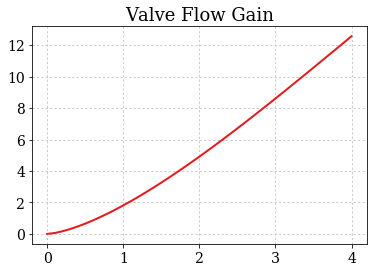

In [7]:
plt.plot(test2, result)
plt.title('Valve Flow Gain')

## Visualize Gain with Dead Band

Normalize input to s/d, normalize area to 1

In [8]:
def compute_area_with_deadband(s, r, s0):
    return compute_orifice_area(s - s0, r)

In [9]:
s = np.arange(0, 1.201, 0.001)
s0 = 0.2
r = 0.5

# Replace this hack so that RuntimeWarning is not raised
Ar = compute_area_with_deadband(s, r, s0)
Ar = np.nan_to_num(Ar)
Ar = Ar / Ar[-1]
Ar.shape

/Users/mitchallain/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:2: RuntimeWarning: invalid value encountered in arccos
  from ipykernel import kernelapp as app


(1201,)

## Spool Valve Gain for Comparison

Pull the spool valve gain from 652 or 655 project.

In [10]:
def compute_area_spool(s, r):
    area = r**2 * np.arccos((r - s) / r) - (r - s) * np.sqrt(2.0 * r * s - s**2)
    return area

In [11]:
spool = np.arange(0, 1.001, 0.001)
As = compute_area_spool(spool, r)
As_normal = As / As[-1]

pad = np.arange(0, 0.2, 0.001)
spool = np.concatenate((pad, spool + 0.2))
As_normal = np.concatenate((pad*0, As_normal))
spool.shape, As_normal.shape

((1201,), (1201,))

In [12]:
line = np.arange(0, 1.001, 0.001)
line = np.concatenate((pad*0, line))

In [13]:
plt.style.available
mpl.get_configdir()

u'/Users/mitchallain/.matplotlib'

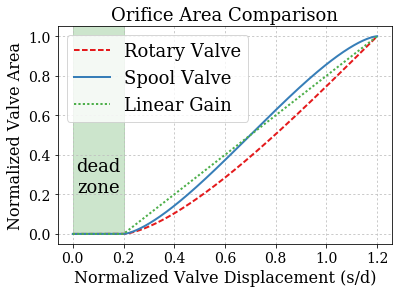

In [14]:
plt.plot(s, Ar, linestyle='--', label='Rotary Valve', dash_capstyle='butt')
plt.plot(s, As_normal, linestyle='-', label='Spool Valve', dash_capstyle='butt')
plt.plot(s, line, linestyle=':', label='Linear Gain', dash_capstyle='butt')

ax = plt.gca()
ax.add_patch(mpl.patches.Rectangle((0, 0), 0.2, 3, color='g', alpha=0.2))
ax.text(0.1, 0.21, 'dead\nzone', fontsize=18, horizontalalignment='center')

plt.title('Orifice Area Comparison')

plt.legend(loc='best')
plt.xlabel('Normalized Valve Displacement (s/d)')
plt.ylabel('Normalized Valve Area')
# plt.tight_layout()
plt.savefig('figs/valve_area.pdf')


## Verify MATLAB get_rotary_orifice_area()

In [16]:
0.2 * 1 / 0.8

0.25

In [18]:
compute_orifice_area(0.25, 0.5)

0.11332793849440245

Good!